# Used Cars Dataset
Vehicles listings from Craigslist.org

https://www.kaggle.com/austinreese/craigslist-carstrucks-data

https://github.com/AustinReese/craigslistFilter



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # Keras API is packaged inside Tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [8]:
df = pd.read_csv('vehicles.csv')

In [9]:
df.head().transpose()

,0,1,2,3,4
id,7119256118,7120880186,7115048251,7119250502,7120433904
url,https://mohave.craigslist.org/ctd/d/lake-havas...,https://oregoncoast.craigslist.org/cto/d/warre...,https://greenville.craigslist.org/cto/d/sparta...,https://mohave.craigslist.org/cto/d/lake-havas...,https://maine.craigslist.org/ctd/d/searsport-t...
region,mohave county,oregon coast,greenville / upstate,mohave county,maine
region_url,https://mohave.craigslist.org,https://oregoncoast.craigslist.org,https://greenville.craigslist.org,https://mohave.craigslist.org,https://maine.craigslist.org
price,3495,13750,2300,9000,0
year,2012,2014,2001,2004,2021
manufacturer,jeep,bmw,dodge,chevrolet,NaN
model,patriot,328i m-sport,caravan,colorado ls,Honda-Nissan-Kia-Ford-Hyundai-VW
condition,like new,good,excellent,excellent,NaN
cylinders,4 cylinders,NaN,6 cylinders,5 cylinders,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435849 entries, 0 to 435848
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            435849 non-null  int64  
 1   url           435849 non-null  object 
 2   region        435849 non-null  object 
 3   region_url    435849 non-null  object 
 4   price         435849 non-null  int64  
 5   year          434732 non-null  float64
 6   manufacturer  415102 non-null  object 
 7   model         429650 non-null  object 
 8   condition     249043 non-null  object 
 9   cylinders     269465 non-null  object 
 10  fuel          432858 non-null  object 
 11  odometer      360701 non-null  float64
 12  title_status  434043 non-null  object 
 13  transmission  433703 non-null  object 
 14  vin           239197 non-null  object 
 15  drive         313838 non-null  object 
 16  size          139888 non-null  object 
 17  type          318741 non-null  object 
 18  pain

In [7]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1117
manufacturer     20747
model             6199
condition       186806
cylinders       166384
fuel              2991
odometer         75148
title_status      1806
transmission      2146
vin             196652
drive           122011
size            295961
type            117108
paint_color     135247
image_url           24
description         27
county          435849
state                0
lat               8235
long              8235
dtype: int64

In [12]:
df.drop(['id', 'url', 'region_url', 'image_url'],axis=1, inplace=True)

In [13]:
df.corr()

,price,year,odometer,county,lat,long
price,1.000000,-0.022807,0.005733,NaN,0.000062,-0.003731
year,-0.022807,1.000000,-0.243991,NaN,-0.003228,-0.024384
odometer,0.005733,-0.243991,1.000000,NaN,0.003917,0.037398
county,NaN,NaN,NaN,NaN,NaN,NaN
lat,0.000062,-0.003228,0.003917,NaN,1.000000,-0.166059
long,-0.003731,-0.024384,0.037398,NaN,-0.166059,1.000000


In [34]:
df.drop(['region', 'model', 'vin', 'description', 'county', 'state' ],axis=1, inplace=True)
# 'model' data are messy, with thousands of different entries
# 'county' is all NaN
# 'state' and 'region' could be predicted by 'lat' and 'long' features

In [35]:
df.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'lat', 'long'],
      dtype='object')

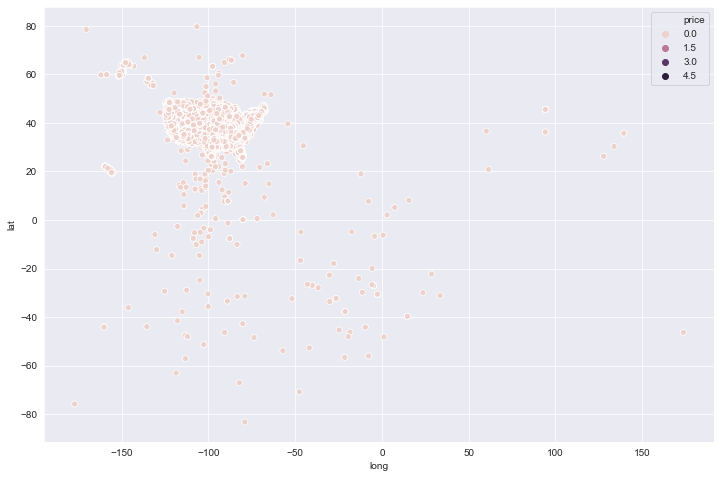

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df, hue='price')

In [47]:
# Eliminating data points with lat-long falling outside the COTUS
df = df[(df['lat'] > 25) & (df['lat'] < 50) &  (df['long'] > -125) & (df['long'] < -66)]

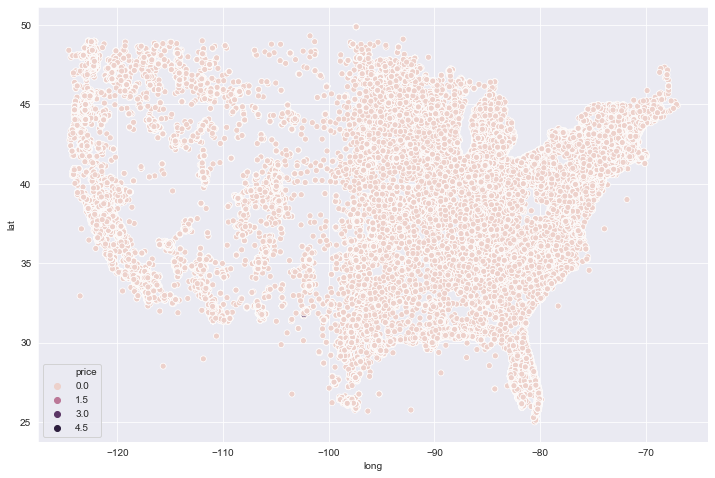

In [49]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df, hue='price')

In [50]:
df.isnull().sum()

price                0
year              1066
manufacturer     19887
condition       176767
cylinders       162651
fuel              2722
odometer         73676
title_status      1775
transmission      2043
drive           118711
size            285968
type            114900
paint_color     132595
lat                  0
long                 0
dtype: int64